In [1]:
import networkx as nx, matplotlib.pyplot as plt
import numpy as np, pandas as pd
import math, seaborn as sns
from scipy import stats

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df1 = pd.read_csv('C:/Users/saich/OneDrive/Desktop/SNA/project/marvel_characters.csv')
df2 = pd.read_csv('C:/Users/saich/OneDrive/Desktop/SNA/project/marvel_titles.csv')

In [3]:
GT = nx.Graph()
new_G = nx.Graph()
#GT.add_nodes_from(df['character'].tolist(),bipartite=1,node_color='w',alpha=0.4,node_shape='d')

for index, row in df2.iterrows():
  GT.add_node(row['title'] + '*', bipartite=0, media_type=row['type'], release_year=row['release_year'], release_month=row['release_month'], release_day=row['release_day'], rating=row['rating'], length=row['length'], starts=row['stars'], genres=row['genres'])
 

In [4]:
for index, row in df1.iterrows():
  if row['title'] == 'What If...?':
    char_name = row['character'] + '-AR'
  else:
    char_name = row['character']
  GT.add_node(char_name, bipartite=1, alias=row['character_alias'], actor=row['actor'])

for index, row in df1.iterrows():
  if row['title'] == 'What If...?':
    char_name = row['character'] + '-AR'
  else:
    char_name = row['character']
  GT.add_edge(row['title'] + '*', char_name)

In [5]:
#GT.add_nodes_from(df2['title'].tolist(),bipartite=0,  node_color='red', alpha=0.4, node_shape='s')
#for i in range(len(df.index)):
 #   GT.add_edge(df2.at[i,'title'],df1.at[i,'character'])

In [6]:
character_nodes = {n for n, d in GT.nodes(data=True) if d['bipartite'] == 1}
title_nodes = set(GT) - character_nodes   


In [7]:
len(character_nodes) # number of characters

794

In [8]:
len(title_nodes) # titles count

60

In [9]:
len(GT.edges)

1142

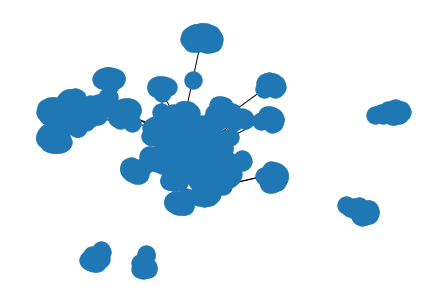

In [10]:
#pos = nx.spring_layout(GT)
#nx.draw(GT)
pos = nx.spring_layout(GT)
nx.draw(GT)#,pos,with_labels=True,font_color='red')

In [11]:
list(GT.neighbors('Tony Stark'))
#List of Marvel movies Tony Stark acted

['Iron Man*',
 'Iron Man 2*',
 'The Avengers*',
 'Iron Man 3*',
 'Avengers: Age of Ultron*',
 'Captain America: Civil War*',
 'Spider-Man: Homecoming*',
 'Avengers: Infinity War*',
 'Avengers: Endgame*']

In [12]:
list(GT.neighbors('Avengers: Age of Ultron*'))
#Main characters in the Avengers: Age of Ultron

['Tony Stark',
 'Thor',
 'Bruce Banner',
 'Steve Rogers',
 'Natasha Romanoff',
 'Clint Barton',
 'Ultron',
 'Nick Fury',
 'James Rhodes',
 'Pietro Maximoff',
 'Wanda Maximoff',
 'Jarvis',
 'Maria Hill',
 'Sam Wilson',
 'Heimdall',
 'Laura Barton',
 'Erik Selvig',
 'Dr. Helen Cho',
 'Strucker',
 'Ulysses Klaue',
 'Friday']

In [13]:
# To find the Similarities between the nodes
def Jaccard_Cosine_Smlrty(G,l):
    num = list(set([n for n in G.neighbors(l[0])]) & set([m for m in G.neighbors(l[1])]))
    print('Common between the',l[0],'and', l[1],'are', num)
    denom_j = list(set([n for n in G.neighbors(l[0])] + [m for m in G.neighbors(l[1])]))
    print('Jaccard Similarity is ', len(num)/len(denom_j))
    denom_c = math.sqrt(len([n for n in G.neighbors(l[0])])*len([n for n in G.neighbors(l[1])]))
    print('Cosine Similarity is', len(num)/denom_c)

In [14]:
l = ['Tony Stark','Steve Rogers']
Jaccard_Cosine_Smlrty(GT,l)

Common between the Tony Stark and Steve Rogers are ['Avengers: Age of Ultron*', 'The Avengers*', 'Captain America: Civil War*', 'Avengers: Endgame*', 'Avengers: Infinity War*']
Jaccard Similarity is  0.45454545454545453
Cosine Similarity is 0.629940788348712


In [15]:
l2= ['Avengers: Age of Ultron*', 'Avengers: Endgame*']
Jaccard_Cosine_Smlrty(GT,l2)

Common between the Avengers: Age of Ultron* and Avengers: Endgame* are ['James Rhodes', 'Nick Fury', 'Thor', 'Bruce Banner', 'Sam Wilson', 'Tony Stark', 'Steve Rogers', 'Clint Barton', 'Wanda Maximoff', 'Jarvis', 'Natasha Romanoff', 'Laura Barton', 'Friday', 'Maria Hill']
Jaccard Similarity is  0.2028985507246377
Cosine Similarity is 0.3879917968315853


### Isolated Components

In [16]:
# isolated components
i= nx.number_connected_components(GT)
i

6

In [17]:
[GT.subgraph(c).copy() for c in nx.connected_components(GT)]

In [18]:
for c in nx.connected_components(GT):
    print(c)

{'Gorgon', 'Daniel Sousa', 'The Defenders*', 'Agent Ford', 'Sarah Wilson', 'Peter Parker3', 'Shameek Smith', 'Groot', 'Detective Rivera', 'Isaiah Bradley', 'Natasha Romanoff-AR', 'El Aguila', 'Thunderball', 'Cooper Barton', 'Daredevil*', 'Sheikh Abdullah', 'Miss Minutes', 'Arthur', 'Maria Hill', 'White Power Dave', 'Mallory Book', "O'Connor", 'Dr. Karl Malus', 'The Avengers*', 'BB', 'Doctor David Kurata', 'Dottie Underwood', 'Okoye', 'Dwayne Blaskowski', 'Mrs. Chen', 'Bobbi Morse', 'Topaz', 'Giyera', 'Mama Donya', 'Jason Wilkes', 'Darryl', "Robert 'Whizzer' Coleman", 'Ivan', 'Quentin Beck', 'Detective Caudle', 'Fletcher Heggs', 'Hope Van Dyne', 'Wanda Maximoff', 'Marilyn', 'Runa', 'Vido Arocho', 'Auntie Zara', 'Cull Obsidian', 'Ebony Maw-AR', 'Gregory Sallinger', 'Roger Dooley', 'Morris Walters', 'Eitri', 'Louise Thompson', "Timothy 'Dum Dum' Dugan-AR", 'Holden Holliway', 'Algrim', 'Antonia', 'Tomas', 'Herman', 'Proxima Midnight-AR', 'Herb', 'Auran', 'Okoye-AR', 'Heinz Kruger', 'Danny 

### 6 Clusters are 
#### 1 - Werewolf by Night
#### 2 - Moon Knight
#### 3 - Eternals
#### 4 - Helstrom
#### 5 - Cloak & Dagger' & Runaways 
#### 6 - WHIH News Front, The Falcon and the Winter Soldier, Guardians of the Galaxy Vol. 2, Marvel One-Shot: The Consultant, Doctor Strange, Iron Man, Thor, The Avengers, Daredevil, The Incredible Hulk, Avengers: Endgame, Thor: Love and Thunder, Avengers: Age of Ultron, Iron Man 2, Marvel One-Shot: All Hail the King, Hawkeye, The Defenders, Marvel One-Shot: A Funny Thing Happened on the Way to Thor's Hammer, Doctor Strange in the Multiverse of Madness, Iron Fist, WandaVision, Peter's To-Do List, Captain America: The First Avenger, Guardians of the Galaxy, What If...?, Secret Invasion, Black Panther, Thor: Ragnarok, She-Hulk: Attorney at Law, Agents of S.H.I.E.L.D.: Slingshot, Captain America: Civil War, The Punisher, Luke Cage, Spider-Man: Far from Home, Captain Marvel, Iron Man 3, Inhumans, Loki, Jessica Jones, Agent Carter, Agents of S.H.I.E.L.D., Marvel One-Shot: Item 47, Spider-Man: No Way Home, I Am Groot, Marvel One-Shot: Agent Carter, Ant-Man, Shang-Chi and the Legend of the Ten Rings, Thor: The Dark World, Captain America: The Winter Soldier, Ms. Marvel,cAnt-Man and the Wasp, Black Widow, Avengers: Infinity War, Spider-Man: Homecoming



In [19]:
nx.node_connected_component(GT,'Werewolf by Night*')

{'Azarel',
 'Barasso',
 'Billy Swan',
 'Elsa Bloodstone',
 'Jack Russell',
 'Jovan',
 'Liorn',
 'Ted (The Man-Thing)',
 'The Flaming Tuba',
 'Ulysses Bloodstone',
 'Verussa',
 'Werewolf by Night*'}

In [20]:
#df2.at[2,'title']
#GT.neighbors('Werewolf by Night*')
set([n for n in GT.neighbors('Werewolf by Night*')])

{'Azarel',
 'Barasso',
 'Billy Swan',
 'Elsa Bloodstone',
 'Jack Russell',
 'Jovan',
 'Liorn',
 'Ted (The Man-Thing)',
 'The Flaming Tuba',
 'Ulysses Bloodstone',
 'Verussa'}

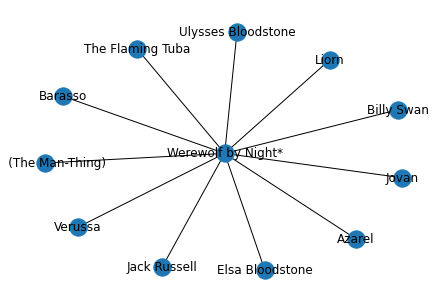

In [21]:
#Isolated Network of Werewolf team 
G_Werewolf = nx.Graph()
hrs = list(set([n for n in GT.neighbors('Werewolf by Night*')]))
for j in range(len(df1.index)):
    if (df1.at[j,'character'] in hrs ):
        G_Werewolf.add_edge("Werewolf by Night*",df1.at[j,'character'])
        #print(1)
nx.draw(G_Werewolf,with_labels=True, font_color='black')


In [22]:
nx.node_connected_component(GT,"Eternals*")

{'Ajak',
 'Arishem',
 'Ben',
 'Dane Whitman',
 'Druig',
 'Eros',
 'Eternals*',
 'Gilgamesh',
 'Ikaris',
 'Jack',
 'Karun',
 'Kingo',
 'Kro',
 'Makkari',
 'Phastos',
 'Sersi',
 'Sprite',
 'Thena'}

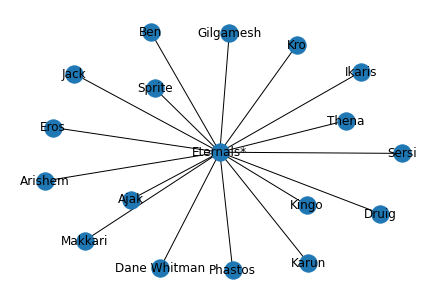

In [23]:
#Isolated Network of Eternals team 
G_Eternals = nx.Graph()
# for i in range(len(df2.index)):
#     if (df2.at[i,'title'] == 'Eternals*'):G_Eternals.add_edge(df2.at[i,'title'],df2.at[i,'character'])
hrs = list(set([n for n in GT.neighbors('Eternals*')]))
for j in range(len(df1.index)):
    if (df1.at[j,'character'] in hrs ):
        G_Eternals.add_edge("Eternals*",df1.at[j,'character'])
       
nx.draw(G_Eternals,with_labels=True, font_color='black')


In [24]:
nx.node_connected_component(GT,"Moon Knight*")

{'Anton Mogart',
 'Arthur Harrow',
 'Bek',
 'Billy',
 'Bobbi',
 'Crawley',
 'Donna',
 'J.B.',
 'Khonshu',
 'Layla El-Faouly',
 'Marc Spector',
 'Moon Knight*',
 'Selim',
 'Taweret',
 'Wendy Spector',
 'Yatzil'}

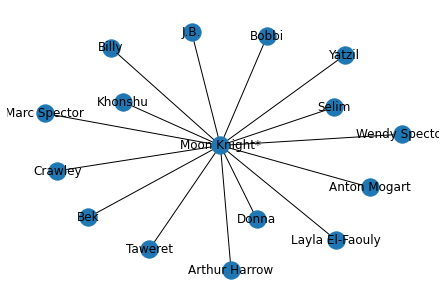

In [25]:
G_Moon_Knight = nx.Graph()
# for i in range(len(df2.index)):
#     if (df2.at[i,'title'] == 'Moon Knight*'):G_Moon_Knight.add_edge(df2.at[i,'title'],df2.at[i,'character'])
hrs = list(set([n for n in GT.neighbors('Moon Knight*')]))
for j in range(len(df1.index)):
    if (df1.at[j,'character'] in hrs ):
        G_Moon_Knight.add_edge("Moon Knight*",df1.at[j,'character'])
nx.draw(G_Moon_Knight,with_labels=True, font_color='black')

In [26]:
nx.node_connected_component(GT,"Helstrom*")

{'Alex Tilden',
 'Ana Helstrom',
 'Archbishop Terrazi',
 'Aubree Richards',
 'Bryce',
 'Cameron Tate',
 'Chris Yen',
 'Daimon Helstrom',
 'Dr. Louise Hastings',
 'Ellis',
 'Esther',
 'Father Joshua Crow',
 'Finn',
 'Gabriella Rosetti',
 'Helstrom*',
 'Jolene Spivey',
 'Keith Spivey',
 'Kthara',
 'Lee',
 'Officer Derrick Jackson',
 'Papa',
 'Victoria Helstrom'}

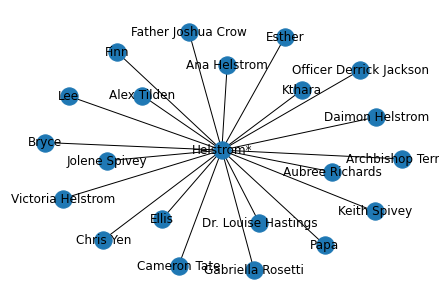

In [27]:
G_Helstrom = nx.Graph()
# for i in range(len(df.index)):
#     if (df.at[i,'title'] == 'Helstrom*'):G_Helstrom.add_edge(df.at[i,'title'],df.at[i,'character'])
hrs = list(set([n for n in GT.neighbors('Helstrom*')]))
for j in range(len(df1.index)):
    if (df1.at[j,'character'] in hrs ):
        G_Helstrom.add_edge("Helstrom*",df1.at[j,'character'])
nx.draw(G_Helstrom,with_labels=True, font_color='black')

In [28]:
nx.node_connected_component(GT,'Cloak & Dagger*')
# 'Runaways' or 'Cloak & Dagger' titles are in same cluster

{'Adina Johnson',
 'Alex Wilder',
 'Amy Minoru',
 'Andre Deschaine',
 "Anthony 'AWOL' Wall",
 'Auntie Chantelle',
 'Aura',
 'Bronwyn',
 'Catherine Wilder',
 'Chase Stein',
 'Choo Choo Broussard',
 'Cloak',
 'Cloak & Dagger*',
 'Dagger',
 'Dale Yorkes',
 'Darius',
 'Destiny Gonzalez',
 "Detective Brigid O'Reilly",
 'Detective Connors',
 'Detective Flores',
 'Duane Porter',
 'Eiffel',
 'Evita Fusilier',
 'Frances',
 'Frank Dean',
 'Geoffrey Wilder',
 'Gert Yorkes',
 'Graciela Aguirre',
 'Ivan Hess',
 'Janet Stein',
 'Jonah',
 'Karolina Dean',
 'Leslie Dean',
 'Lia',
 'Liam Walsh',
 'Livvie',
 'Melissa Bowen',
 'Mikayla Bell',
 'Mike on a Bike',
 'Millennial Megan',
 'Mina Hess',
 'Molly Hernandez',
 'Morgan le Fay',
 'Nathan Bowen',
 'Nico Minoru',
 'Officer Fuchs',
 'Otis Johnson',
 'Peter Scarborough',
 'Robert Minoru',
 'Runaways*',
 'Solomon',
 'Stacey Yorkes',
 'Susan Ellerh',
 'Tamar',
 'Tina Minoru',
 'Topher',
 'Vaughn',
 'Victor Stein',
 'Xavin'}

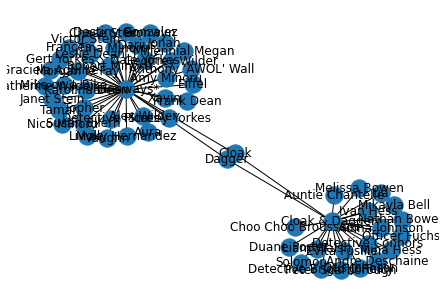

In [29]:
G_CDR = nx.Graph()
# for i in range(len(df.index)):
#     if (df.at[i,'title'] == 'Cloak & Dagger*' or df.at[i,'title'] == 'Runaways*'):
hrs1 = list(set([n for n in GT.neighbors('Cloak & Dagger*')]))
hrs2 = list(set([n for n in GT.neighbors('Runaways*')]))
for j in range(len(df1.index)):
    if (df1.at[j,'character'] in hrs1):
        G_CDR.add_edge("Cloak & Dagger*",df1.at[j,'character'])
    if  (df1.at[j,'character'] in hrs2):
        G_CDR.add_edge("Runaways*",df1.at[j,'character'])
nx.draw(G_CDR,with_labels=True, font_color='black')

### Parameters

In [30]:
def deg_dst(G7): # degree distribution of titles and characters
    degrees = [G7.degree(n) for n in title_nodes]
    deg,freq = np.unique(degrees,return_counts=True)
    plt.plot(deg,freq,label = 'title degree distribution')
    plt.legend()
    plt.show()
    degrees1 = [G7.degree(n) for n in character_nodes]
    deg1,freq1 = np.unique(degrees1,return_counts=True)
    plt.plot(deg1,freq1,label = 'characters degree distribution')
    plt.legend()
    plt.show()
def avg_deg_cc(G): # average degree and clustering co-efficient
    avg_cc_G = nx.transitivity(G)
    avg_deg_G = G.degree()
    deg_sum_G =0
    for j in list(avg_deg_G):
        deg_sum_G += j[1]
    avg_deg_G =  deg_sum_G/len(G.nodes())
    return (avg_deg_G, avg_cc_G)

In [31]:
def deg_dst_Graph(G7):
    degrees = [G7.degree(n) for n in G7.nodes()]
    deg,freq = np.unique(degrees,return_counts=True)
    plt.plot(deg,freq,label = 'Total nodes degree distribution')
    plt.legend()
    plt.show()

In [32]:
avg_deg_, avg_clstrng_ = avg_deg_cc(GT) 
#print('Average degree of Network', avg_deg_,'clustering co-efficient', avg_clstrng_)

In [33]:
num = 0 
for c in nx.connected_components(GT):
    num += nx.average_shortest_path_length(GT.subgraph(c))*len(GT.subgraph(c))

In [34]:
GT_avg_path = num/len(GT.nodes())

In [35]:
print("MU Network \n ")
print("Average degree" ,avg_deg_ )
print("Average path",GT_avg_path)
print("Average clusteirng", avg_clstrng_)

MU Network 
 
Average degree 2.6744730679156907
Average path 5.8150060878361405
Average clusteirng 0


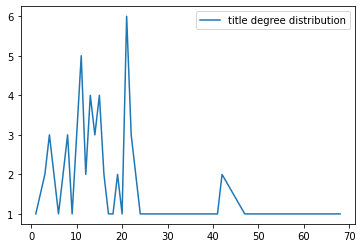

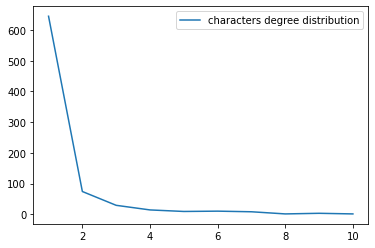

In [36]:
deg_dst(GT)

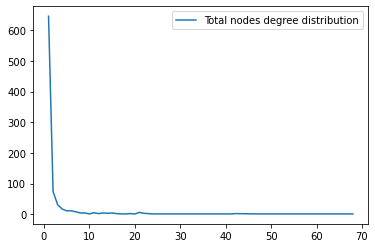

In [37]:
deg_dst_Graph(GT)

In [38]:
#des = [GT.degree(n) for n in title_nodes]
titles_dict ={}
characters_dict={}
for n in title_nodes: 
    titles_dict.update({n:GT.degree(n)})
for n in character_nodes:
    characters_dict.update({n:GT.degree(n)})  
#list(des)

In [39]:
#Degrees of Titles and characters
print('Chracters degree',characters_dict)
print('\n titles degree',titles_dict)

Chracters degree {'Gorgon': 1, 'Daniel Sousa': 2, 'Gilgamesh': 1, 'Agent Ford': 1, 'Sarah Wilson': 1, 'Shameek Smith': 1, 'Peter Parker3': 1, 'Dagger': 2, 'Groot': 4, 'Detective Rivera': 1, 'Natasha Romanoff-AR': 1, 'Isaiah Bradley': 1, 'Donna': 1, 'El Aguila': 1, 'Thunderball': 1, 'Cooper Barton': 2, 'Sheikh Abdullah': 1, 'Miss Minutes': 1, 'Arthur': 1, 'Maria Hill': 7, 'White Power Dave': 1, 'Dr. Karl Malus': 1, "O'Connor": 1, 'Mallory Book': 1, 'Doctor David Kurata': 1, 'BB': 1, 'Dottie Underwood': 1, 'Okoye': 3, 'Dwayne Blaskowski': 1, 'Mrs. Chen': 1, 'Bobbi Morse': 1, 'Topaz': 1, 'Giyera': 1, 'Mama Donya': 1, 'Jason Wilkes': 1, 'Darryl': 1, "Robert 'Whizzer' Coleman": 1, 'Ivan': 1, 'Quentin Beck': 1, 'Fletcher Heggs': 1, 'Detective Caudle': 1, 'Hope Van Dyne': 3, 'Arishem': 1, 'Wanda Maximoff': 6, 'Marilyn': 1, 'Runa': 1, 'Vido Arocho': 1, 'Auntie Zara': 1, 'Gregory Sallinger': 1, 'Cull Obsidian': 1, 'Ebony Maw-AR': 1, 'Roger Dooley': 1, 'Melissa Bowen': 1, 'Selim': 1, 'Morris Wal

### Random Simlated graph

In [40]:
GT_p = avg_deg_ /(len(GT.nodes())-1) # caliculating probability
GT_nodes=len(GT.nodes())
print('Random model probability value',GT_p, 'and length of nodes', GT_nodes)

Random model probability value 0.003135372881495534 and length of nodes 854


In [41]:
GT_sim_rndm = nx.gnp_random_graph(GT_nodes, GT_p)

In [42]:
# Simulated Random 
avg_deg_sim, avg_clstrng_sim =  avg_deg_cc(GT_sim_rndm)

#### Isoloated graphs in network

In [43]:
i= nx.number_connected_components(GT_sim_rndm)
i

59

In [44]:
num = 0 
for c in nx.connected_components(GT_sim_rndm):
    num += nx.average_shortest_path_length(GT_sim_rndm.subgraph(c))*len(GT_sim_rndm.subgraph(c))
GT_sim_avg_path = num/len(GT_sim_rndm.nodes())

In [45]:
print("Random Simulated MU Network \n ")
print("Average degree" ,avg_deg_sim)
print("Average path", GT_sim_avg_path)
print("Average clusteirng", avg_clstrng_sim)


Random Simulated MU Network 
 
Average degree 2.8337236533957846
Average path 5.848907597901165
Average clusteirng 0.0017421602787456446


In [46]:
print("MU Network \n ")
print("Average degree" ,avg_deg_ )
print("Average path",GT_avg_path)
print("Average clusteirng", avg_clstrng_)


MU Network 
 
Average degree 2.6744730679156907
Average path 5.8150060878361405
Average clusteirng 0


In [47]:
val1= GT_sim_avg_path/GT_avg_path
print(' Average path of Random Model Graph is ',val1,'times the average path of Marvel Uuniverse')
#val2 =  avg_clstrng_sim/avg_clstrng_
#print('Clustering co-efficient of Random graph is',val2,'times the Clustering co-efficient of Marvel Uuniverse')

 Average path of Random Model Graph is  1.0058300042257806 times the average path of Marvel Uuniverse


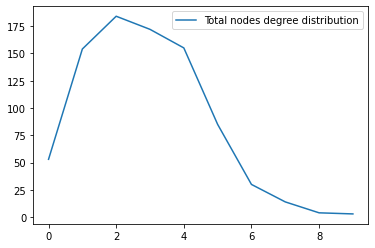

In [48]:
deg_dst_Graph(GT_sim_rndm)

### Preferential Algorithm Method

#### Connecting 'Moon Knight', 'Eternals', 'Helstrom', 'Cloak & Dagger' & 'Runaways' and 'Werewolf by Night' clusters' actors (nodes) to the base(main) cluster based on the Preferential Algorithm Method 
#### Comparing the clustering co-efficient, average path and degree distribution of new network with the actual MU network 

In [49]:
new_nodes=list()
new_nodes1 = list(GT.neighbors('Werewolf by Night*'))
for i in new_nodes1: new_nodes.append(i)
new_nodes2= list(GT.neighbors('Moon Knight*'))
for i in new_nodes2: new_nodes.append(i)
new_nodes3= list(GT.neighbors('Eternals*'))
for i in new_nodes3: new_nodes.append(i)
new_nodes4= list(GT.neighbors('Helstrom*'))
for i in new_nodes4: new_nodes.append(i)
new_nodes5 = list(GT.neighbors('Runaways*'))
for i in new_nodes5: new_nodes.append(i)
new_nodes6 = list(GT.neighbors('Cloak & Dagger*'))
for i in new_nodes6: new_nodes.append(i)
print(new_nodes) # Nodes (actors) adding to the base cluster
print(len(new_nodes))

['Jack Russell', 'Elsa Bloodstone', 'Verussa', 'Jovan', 'Azarel', 'Liorn', 'Barasso', 'Billy Swan', 'Ted (The Man-Thing)', 'The Flaming Tuba', 'Ulysses Bloodstone', 'Marc Spector', 'Arthur Harrow', 'Layla El-Faouly', 'Khonshu', 'Bobbi', 'Billy', 'Taweret', 'Selim', 'Crawley', 'Donna', 'Yatzil', 'J.B.', 'Bek', 'Anton Mogart', 'Wendy Spector', 'Sersi', 'Ikaris', 'Thena', 'Ajak', 'Dane Whitman', 'Kingo', 'Sprite', 'Phastos', 'Makkari', 'Druig', 'Gilgamesh', 'Karun', 'Kro', 'Ben', 'Jack', 'Eros', 'Arishem', 'Daimon Helstrom', 'Ana Helstrom', 'Victoria Helstrom', 'Gabriella Rosetti', 'Dr. Louise Hastings', 'Chris Yen', 'Keith Spivey', 'Father Joshua Crow', 'Finn', 'Esther', 'Bryce', 'Officer Derrick Jackson', 'Ellis', 'Jolene Spivey', 'Alex Tilden', 'Archbishop Terrazi', 'Cameron Tate', 'Lee', 'Kthara', 'Papa', 'Aubree Richards', 'Alex Wilder', 'Nico Minoru', 'Karolina Dean', 'Gert Yorkes', 'Chase Stein', 'Molly Hernandez', 'Catherine Wilder', 'Geoffrey Wilder', 'Janet Stein', 'Victor Stein

In [50]:
# Removing 'Moon Knight','Eternals', 'Helstrom', 'Cloak & Dagger' & Runaways' and 'Werewolf by Night' clusters from the main graph
GT_p = GT.copy()
for i in new_nodes: 
    if i in GT_p.nodes(): GT_p.remove_node(i)
GT_p.remove_node('Moon Knight*')
GT_p.remove_node('Eternals*')
GT_p.remove_node('Helstrom*')
GT_p.remove_node('Cloak & Dagger*') 
GT_p.remove_node('Runaways*')
GT_p.remove_node('Werewolf by Night*')
print("Node count in actual MU network",len(GT.nodes()))
print("Removing the nodes including the small clusters titles",len(new_nodes))
print("Node count after removing nodes from the MU network",len(GT_p.nodes()))

Node count in actual MU network 854
Removing the nodes including the small clusters titles 123
Node count after removing nodes from the MU network 727


In [51]:
def PAM(G,avg_deg,new_nodes):
    node_count=len(G.nodes())
    G_PAM = nx.Graph
    G_PAM = G.copy()
    i = node_count-1
    G_node_list = np.array((G.nodes()))
    #node probability
    node_prob =[]
    for n in G.nodes():
        prob = G.degree(n)/(2*len(G.edges()))
        node_prob.append(prob)
#node_prob
    
    for n in range(len(new_nodes)):
        i = np.random.choice(new_nodes)
        G_PAM.add_node(i)
        while (G_PAM.degree(i)!=round(avg_deg)):
            j=np.random.choice(G_node_list, p= node_prob)
            print(i,j,G_PAM.degree(i))
            G_PAM.add_edge(i,j)
        new_nodes.remove(i) 
        
    return G_PAM    

In [52]:
GT_pp = GT.copy()
PAM_MU = PAM(GT_p,avg_deg_,new_nodes)

Ben Iron Fist* 0
Ben Secret Invasion* 1
Ben Anansi 2
Wendy Spector Agent Vega 0
Wendy Spector Wendy 1
Wendy Spector Secretary Ross 2
J.B. Sam Wilson 0
J.B. Carlo Eastman 1
J.B. Samuel Sterns 2
Gilgamesh Shang-Chi and the Legend of the Ten Rings* 0
Gilgamesh Mr. Dell 1
Gilgamesh Avengers: Age of Ultron* 2
Aubree Richards Tony Stark 0
Aubree Richards Dr. Stephen Strange 1
Aubree Richards Doctor Strange in the Multiverse of Madness* 2
Destiny Gonzalez Ant-Man and the Wasp* 0
Destiny Gonzalez Spider-Man: Homecoming* 1
Destiny Gonzalez The Falcon and the Winter Soldier* 2
Phastos Mrs. Chen 0
Phastos Avengers: Infinity War* 1
Phastos Gideon Malick 2
Topher Agent Blake 0
Topher Ant-Man and the Wasp* 1
Topher Nebula 2
Dr. Louise Hastings Alan 0
Dr. Louise Hastings Thor: The Dark World* 1
Dr. Louise Hastings What If...?* 2
Alex Wilder Ant-Man and the Wasp* 0
Alex Wilder Guardians of the Galaxy Vol. 2* 1
Alex Wilder Frigga 2
Ikaris What If...?* 0
Ikaris Ms. Marvel* 1
Ikaris Avengers: Infinity Wa

In [53]:
# PAM - MU avg deg n clustering 
avg_deg_PAM, avg_clstrng_PAM = avg_deg_cc(PAM_MU)

In [54]:
# PAM - MU Graph avg path
PAM_avg_path= nx.average_shortest_path_length(PAM_MU)

In [55]:
print(len(PAM_MU.nodes()), len(PAM_MU.edges()))

848 1382


In [56]:
print("PAM-MU Graph \n ")
print("Average degree" ,avg_deg_PAM )
print("Average path", PAM_avg_path)
print("Average clusteirng", avg_clstrng_PAM)

PAM-MU Graph 
 
Average degree 3.259433962264151
Average path 4.498902898131028
Average clusteirng 0.002129641953946493


In [57]:
print("MU Network \n ")
print("Average degree" ,avg_deg_ )
print("Average path",GT_avg_path)
print("Average clusteirng", avg_clstrng_)

MU Network 
 
Average degree 2.6744730679156907
Average path 5.8150060878361405
Average clusteirng 0


In [58]:
val3= PAM_avg_path/GT_avg_path
print(' Average path of Random Model Graph is ',val3,'times the average path of Marvel Uuniverse')
#val4 =   avg_clstrng_PAM /avg_clstrng_
#print('Clustering co-efficient of Random graph is',val4,'times the Clustering co-efficient of Marvel Uuniverse')

 Average path of Random Model Graph is  0.7736712275403901 times the average path of Marvel Uuniverse


As we removed 6 titles nodes which are in MU network, MU_PAM has 786 nodes. These leads to reduce in average path.

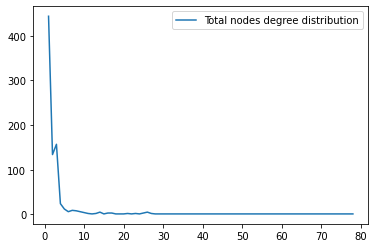

In [59]:
deg_dst_Graph(PAM_MU)
# similar to the actual Graph

#### Centralities

In [60]:
Degree_Centrality = nx.degree_centrality(GT)
#Nodes with high and low degree cenrailities
min_DC = {i for i in Degree_Centrality if Degree_Centrality[i]==min(Degree_Centrality.values())}
max_DC = {i for i in Degree_Centrality if Degree_Centrality[i]==max(Degree_Centrality.values())}
print("Nodes with high degree (", max(Degree_Centrality.values()),")centrality",max_DC,'\n\n Nodes with low degree(',min(Degree_Centrality.values()),') centrality', min_DC)

Nodes with high degree ( 0.07971864009378662 )centrality {'What If...?*'} 

 Nodes with low degree( 0.0011723329425556857 ) centrality {'Gorgon', 'Gilgamesh', 'Agent Ford', 'Sarah Wilson', 'Shameek Smith', 'Peter Parker3', 'Detective Rivera', 'Natasha Romanoff-AR', 'Isaiah Bradley', 'Donna', 'El Aguila', 'Thunderball', 'Sheikh Abdullah', 'Miss Minutes', 'Arthur', 'White Power Dave', 'Dr. Karl Malus', "O'Connor", 'Mallory Book', 'Doctor David Kurata', 'BB', 'Dottie Underwood', 'Dwayne Blaskowski', 'Mrs. Chen', 'Bobbi Morse', 'Topaz', 'Giyera', 'Mama Donya', 'Jason Wilkes', 'Darryl', "Robert 'Whizzer' Coleman", 'Ivan', 'Quentin Beck', 'Fletcher Heggs', 'Detective Caudle', 'Arishem', 'Marilyn', 'Runa', 'Vido Arocho', 'Auntie Zara', 'Gregory Sallinger', 'Cull Obsidian', 'Ebony Maw-AR', 'Roger Dooley', 'Melissa Bowen', 'Selim', 'Morris Walters', 'Mina Hess', 'Louise Thompson', 'Tina Minoru', 'Eitri', "Timothy 'Dum Dum' Dugan-AR", 'Holden Holliway', 'Algrim', 'Antonia', 'Tomas', 'Herman', 'D

In [61]:
EigenVector_Centrality = nx.eigenvector_centrality(GT, max_iter=500)
min_EV = {i for i in EigenVector_Centrality if EigenVector_Centrality[i]==min(EigenVector_Centrality.values())}
max_EV = {i for i in EigenVector_Centrality if EigenVector_Centrality[i]==max(EigenVector_Centrality.values())}
print("Nodes with high Eigen Vector(",max(EigenVector_Centrality.values()),") centrality",max_EV,'\n\n Nodes with low Eigen Vector(',min(EigenVector_Centrality.values()),') centrality', min_EV)

Nodes with high Eigen Vector( 0.4792332447891307 ) centrality {'Avengers: Endgame*'} 

 Nodes with low Eigen Vector( 1.8381415818599166e-23 ) centrality {'Jack Russell', 'Jovan', 'Ulysses Bloodstone', 'Azarel', 'The Flaming Tuba', 'Verussa', 'Barasso', 'Liorn', 'Ted (The Man-Thing)', 'Billy Swan', 'Elsa Bloodstone'}


In [62]:
#Katz_Centality = nx.katz_centrality(GT, max_iter=50000)
#min_KC = {i for i in Katz_Centality if Katz_Centality[i]==min(Katz_Centality.values())}
#max_KC = {i for i in Katz_Centality if Katz_Centality[i]==max(Katz_Centality.values())}
#print("Nodes with high Katz Centality", max_KC,'\n\n Nodes with low Katz_Centality', min_KC)

#Katz unable to find 50k iterations

In [63]:
PageRank= nx.pagerank(GT)
min_PR = {i for i in PageRank if PageRank[i]==min(PageRank.values())}
max_PR = {i for i in PageRank if PageRank[i]==max(PageRank.values())}
print("Nodes with high PageRank(",max(PageRank.values()),")", max_PR,'\n\n Nodes with low PageRank (',min(PageRank.values()),')', min_PR)

Nodes with high PageRank( 0.03676429431655648 ) {'What If...?*'} 

 Nodes with low PageRank ( 0.0003976856366909435 ) {'Eitri', 'Tiny', 'Cull Obsidian', 'Proxima Midnight'}


In [64]:
Betweenness_Centrality=nx.betweenness_centrality(GT)
min_BC = {i for i in Betweenness_Centrality if Betweenness_Centrality[i]==min(Betweenness_Centrality.values())}
max_BC = {i for i in Betweenness_Centrality if Betweenness_Centrality[i]==max(Betweenness_Centrality.values())}
print("Nodes with high Betweenness(",max(Betweenness_Centrality.values()),") Centrality", max_BC,'\n\n Nodes with low Betweenness (', min(Betweenness_Centrality.values()),') Centrality', min_BC)

Nodes with high Betweenness( 0.28564579659728623 ) Centrality {'Spider-Man: No Way Home*'} 

 Nodes with low Betweenness ( 0.0 ) Centrality {'Gorgon', 'Gilgamesh', 'Agent Ford', 'Sarah Wilson', 'Shameek Smith', 'Peter Parker3', 'Detective Rivera', 'Natasha Romanoff-AR', 'Isaiah Bradley', 'Donna', 'El Aguila', 'Thunderball', 'Sheikh Abdullah', 'Miss Minutes', 'Arthur', 'White Power Dave', 'Dr. Karl Malus', "O'Connor", 'Mallory Book', 'Doctor David Kurata', 'BB', 'Dottie Underwood', 'Dwayne Blaskowski', 'Mrs. Chen', 'Bobbi Morse', 'Topaz', 'Giyera', 'Mama Donya', 'Jason Wilkes', 'Darryl', "Robert 'Whizzer' Coleman", 'Ivan', 'Quentin Beck', 'Fletcher Heggs', 'Detective Caudle', 'Arishem', 'Marilyn', 'Runa', 'Vido Arocho', 'Auntie Zara', 'Gregory Sallinger', 'Cull Obsidian', 'Ebony Maw-AR', 'Roger Dooley', 'Melissa Bowen', 'Selim', 'Morris Walters', 'Mina Hess', 'Louise Thompson', 'Tina Minoru', 'Eitri', "Timothy 'Dum Dum' Dugan-AR", 'Holden Holliway', 'Algrim', 'Antonia', 'Tomas', 'Herman

In [65]:
Closeness_Centrality = nx.closeness_centrality(GT)
min_CC = {i for i in Closeness_Centrality if Closeness_Centrality[i]==min(Closeness_Centrality.values())}
max_CC = {i for i in Closeness_Centrality if Closeness_Centrality[i]==max(Closeness_Centrality.values())}
print("Nodes with high Closeness(",max(Closeness_Centrality.values()),") Centrality", max_CC,'\n\n Nodes with low Closeness(',min(Closeness_Centrality.values()),') Centrality', min_CC)

Nodes with high Closeness( 0.21872869310813475 ) Centrality {'Avengers: Endgame*'} 

 Nodes with low Closeness( 0.006754870764249428 ) Centrality {'Jack Russell', 'Jovan', 'Ulysses Bloodstone', 'Azarel', 'The Flaming Tuba', 'Verussa', 'Barasso', 'Liorn', 'Ted (The Man-Thing)', 'Billy Swan', 'Elsa Bloodstone'}


In [66]:
#Didn't get Katz Centrality value so ignoring it in Correlation Matrix
Cntrlts={0:list(Degree_Centrality.values()),1:list(EigenVector_Centrality.values()),
         2:list(PageRank.values()),3:list(Betweenness_Centrality.values()),
         4:list(Closeness_Centrality.values())}   
col_names = row_names = ['Degree Centrality', 'EigenVector Centrality',
                         'PageRank','Betweenness Centrality','Closeness Centrality']
matrix = np.empty((5, 5))
df = pd.DataFrame(matrix, columns=col_names, index=row_names)

for i in range(len(Cntrlts)):
    for j in range(len(Cntrlts)):
        x= stats.pearsonr(Cntrlts[i],Cntrlts[j])
        if i<=j: df.loc[row_names[i]][row_names[j]]=df.loc[row_names[j]][row_names[i]]=x.statistic
print(df)

                        Degree Centrality  EigenVector Centrality  PageRank  \
Degree Centrality                1.000000                0.490222  0.961197   
EigenVector Centrality           0.490222                1.000000  0.281496   
PageRank                         0.961197                0.281496  1.000000   
Betweenness Centrality           0.642821                0.438433  0.558380   
Closeness Centrality             0.198173                0.433183  0.099383   

                        Betweenness Centrality  Closeness Centrality  
Degree Centrality                     0.642821              0.198173  
EigenVector Centrality                0.438433              0.433183  
PageRank                              0.558380              0.099383  
Betweenness Centrality                1.000000              0.253709  
Closeness Centrality                  0.253709              1.000000  


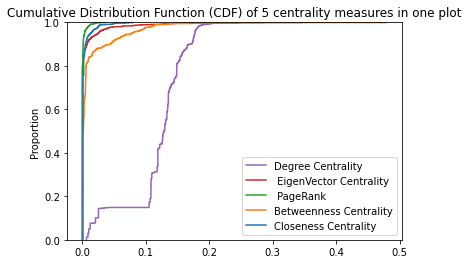

In [67]:
p = sns.ecdfplot(data=Cntrlts, legend=True)
p.set(title ="Cumulative Distribution Function (CDF) of 5 centrality measures in one plot")
p.legend(['Degree Centrality ',' EigenVector Centrality ',' PageRank','Betweenness Centrality','Closeness Centrality'], loc =4)